In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset

In [2]:
data = pd.read_csv('../oral_cancer_prediction_dataset.csv')
data.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Country,Italy,Japan,UK,Sri Lanka,South Africa
Age,36,64,37,55,68
Gender,Female,Male,Female,Male,Male
Tobacco Use,Yes,Yes,No,Yes,No
Alcohol Consumption,Yes,Yes,Yes,Yes,No
HPV Infection,Yes,Yes,No,No,No
Betel Quid Use,No,No,No,Yes,No
Chronic Sun Exposure,No,Yes,Yes,No,No
Poor Oral Hygiene,Yes,Yes,Yes,Yes,Yes


In [3]:
data.duplicated().sum()

0

# Check infomation and null data

In [71]:
data.isnull().sum()

ID                                          0
Country                                     0
Age                                         0
Gender                                      0
Tobacco Use                                 0
Alcohol Consumption                         0
HPV Infection                               0
Betel Quid Use                              0
Chronic Sun Exposure                        0
Poor Oral Hygiene                           0
Diet (Fruits & Vegetables Intake)           0
Family History of Cancer                    0
Compromised Immune System                   0
Oral Lesions                                0
Unexplained Bleeding                        0
Difficulty Swallowing                       0
White or Red Patches in Mouth               0
Tumor Size (cm)                             0
Cancer Stage                                0
Treatment Type                              0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)           

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        84922 non-null  int64  
 1   Country                                   84922 non-null  object 
 2   Age                                       84922 non-null  int64  
 3   Gender                                    84922 non-null  object 
 4   Tobacco Use                               84922 non-null  object 
 5   Alcohol Consumption                       84922 non-null  object 
 6   HPV Infection                             84922 non-null  object 
 7   Betel Quid Use                            84922 non-null  object 
 8   Chronic Sun Exposure                      84922 non-null  object 
 9   Poor Oral Hygiene                         84922 non-null  object 
 10  Diet (Fruits & Vegetables Intake) 

In [73]:
data.describe()

,ID,Age,Tumor Size (cm),Cancer Stage,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year)
count,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000
mean,42461.500000,54.509444,1.747294,1.118756,79.503364,39109.881244,52.028391
std,24515.014117,10.014839,2.028199,1.340418,26.483746,44710.687054,60.389796
min,1.000000,15.000000,0.000000,0.000000,10.000750,0.000000,0.000000
25%,21231.250000,48.000000,0.000000,0.000000,65.233425,0.000000,0.000000
50%,42461.500000,55.000000,0.000000,0.000000,100.000000,0.000000,0.000000
75%,63691.750000,61.000000,3.480075,2.000000,100.000000,76468.437500,104.000000
max,84922.000000,101.000000,5.999899,4.000000,100.000000,159988.000000,179.000000


# Check balance of label

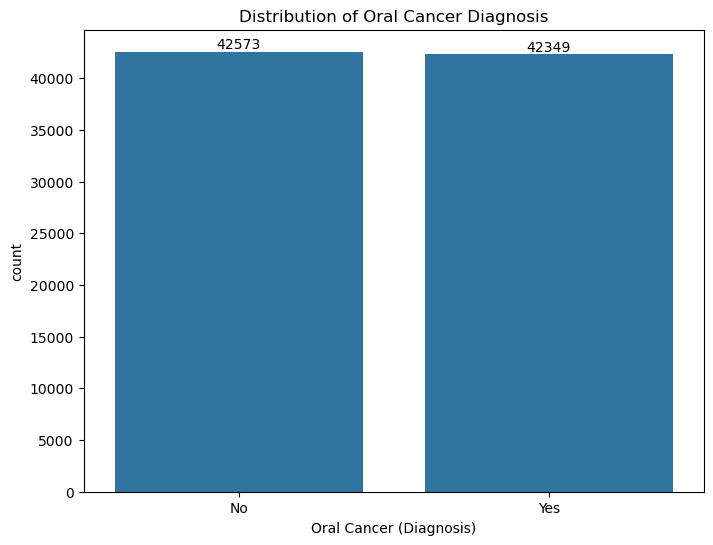

In [74]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='Oral Cancer (Diagnosis)')
plt.title('Distribution of Oral Cancer Diagnosis')
counts = data['Oral Cancer (Diagnosis)'].value_counts()
for i, v in enumerate(counts):
    ax.text(i, v, str(v), horizontalalignment='center', verticalalignment='bottom')
plt.show()

# Split dataset to 3 path: Training set, Validation set, Testing set

In [124]:
X = data.drop('Oral Cancer (Diagnosis)', axis=1)
y = data['Oral Cancer (Diagnosis)']   

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save to CSV files
train_data.to_csv('../train_set.csv', index=False)
val_data.to_csv('../val_set.csv', index=False)
test_data.to_csv('../test_set.csv', index=False)
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (50952, 24)
Validation set shape: (16985, 24)
Test set shape: (16985, 24)


In [4]:
df_train = pd.read_csv('../train_set.csv')
df_val = pd.read_csv('../val_set.csv')
df_test = pd.read_csv('../test_set.csv')

# EDA Training set

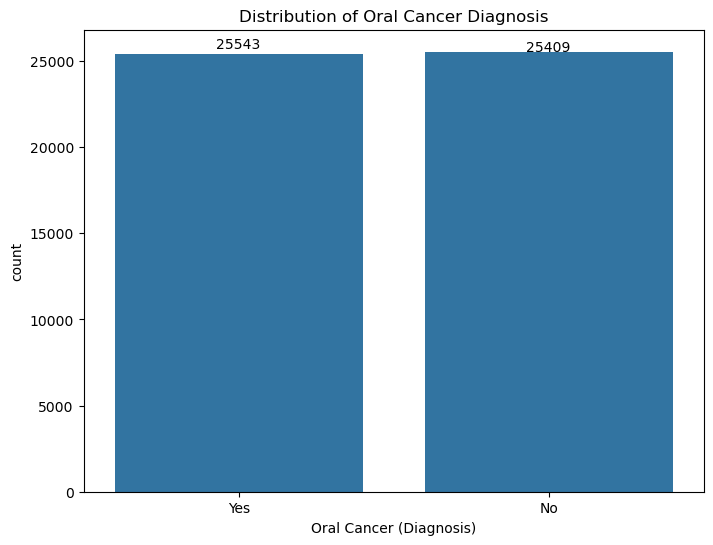

In [77]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_train, x='Oral Cancer (Diagnosis)')
plt.title('Distribution of Oral Cancer Diagnosis')
counts = df_train['Oral Cancer (Diagnosis)'].value_counts()
for i, v in enumerate(counts):
    ax.text(i, v, str(v), horizontalalignment='center', verticalalignment='bottom')
plt.show()

In [78]:
df_train.describe()

,ID,Age,Tumor Size (cm),Cancer Stage,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year)
count,50952.000000,50952.000000,50952.000000,50952.000000,50952.000000,50952.000000,50952.000000
mean,42481.189512,54.493504,1.749977,1.119249,79.492659,39051.385809,52.114775
std,24527.538337,10.034190,2.030243,1.340541,26.488593,44667.673746,60.448483
min,1.000000,15.000000,0.000000,0.000000,10.000750,0.000000,0.000000
25%,21211.000000,48.000000,0.000000,0.000000,65.232517,0.000000,0.000000
50%,42468.500000,55.000000,0.000000,0.000000,100.000000,0.000000,0.000000
75%,63724.750000,61.000000,3.487281,2.000000,100.000000,76297.875000,104.000000
max,84922.000000,101.000000,5.999899,4.000000,100.000000,159986.000000,179.000000


# Numerical Feature

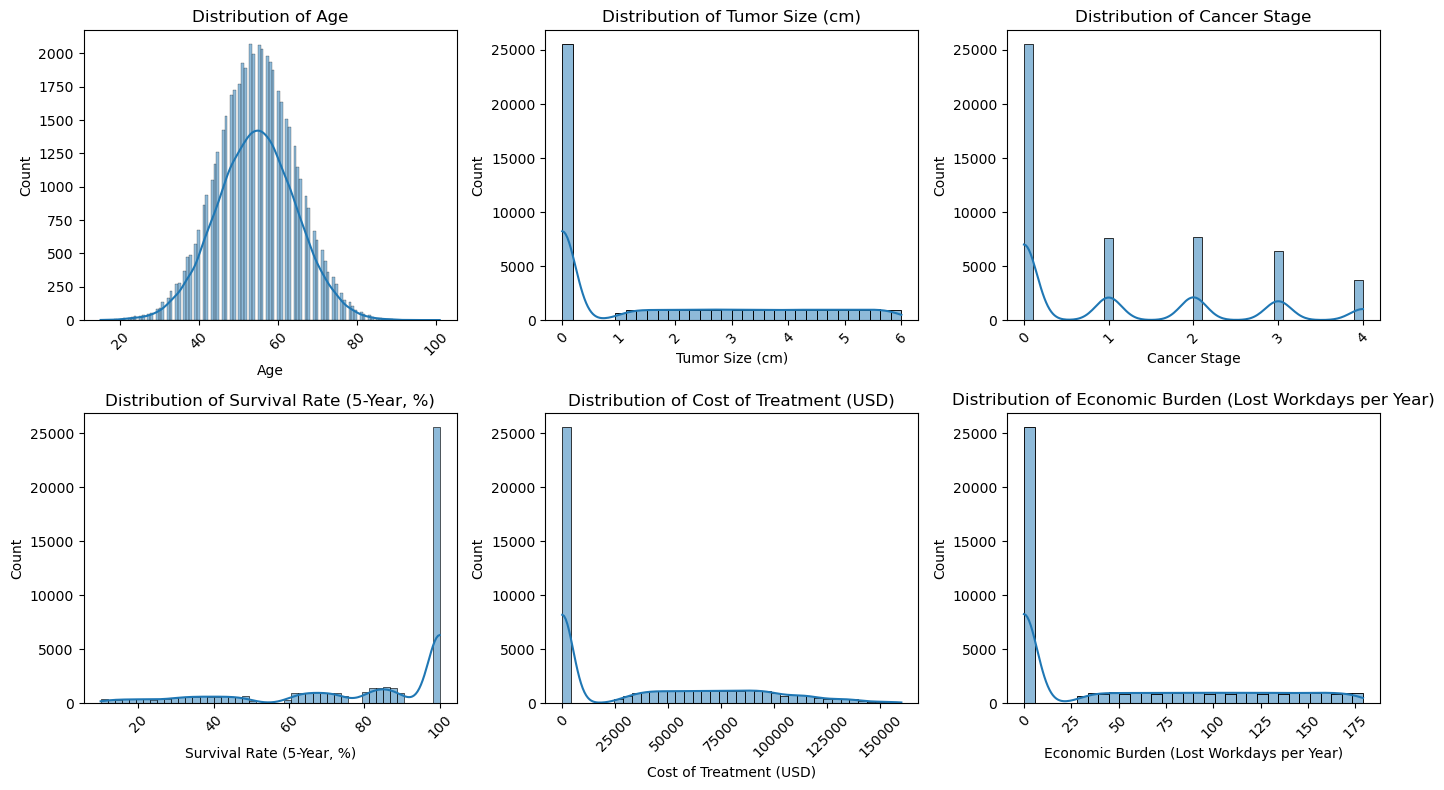

In [79]:
numerical_features = [
    'Age',
    'Tumor Size (cm)',
    'Cancer Stage',
    'Survival Rate (5-Year, %)',
    'Cost of Treatment (USD)',
    'Economic Burden (Lost Workdays per Year)'
]
# Create a figure with subplots for each numerical feature
plt.figure(figsize=(14, 8))

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df_train, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

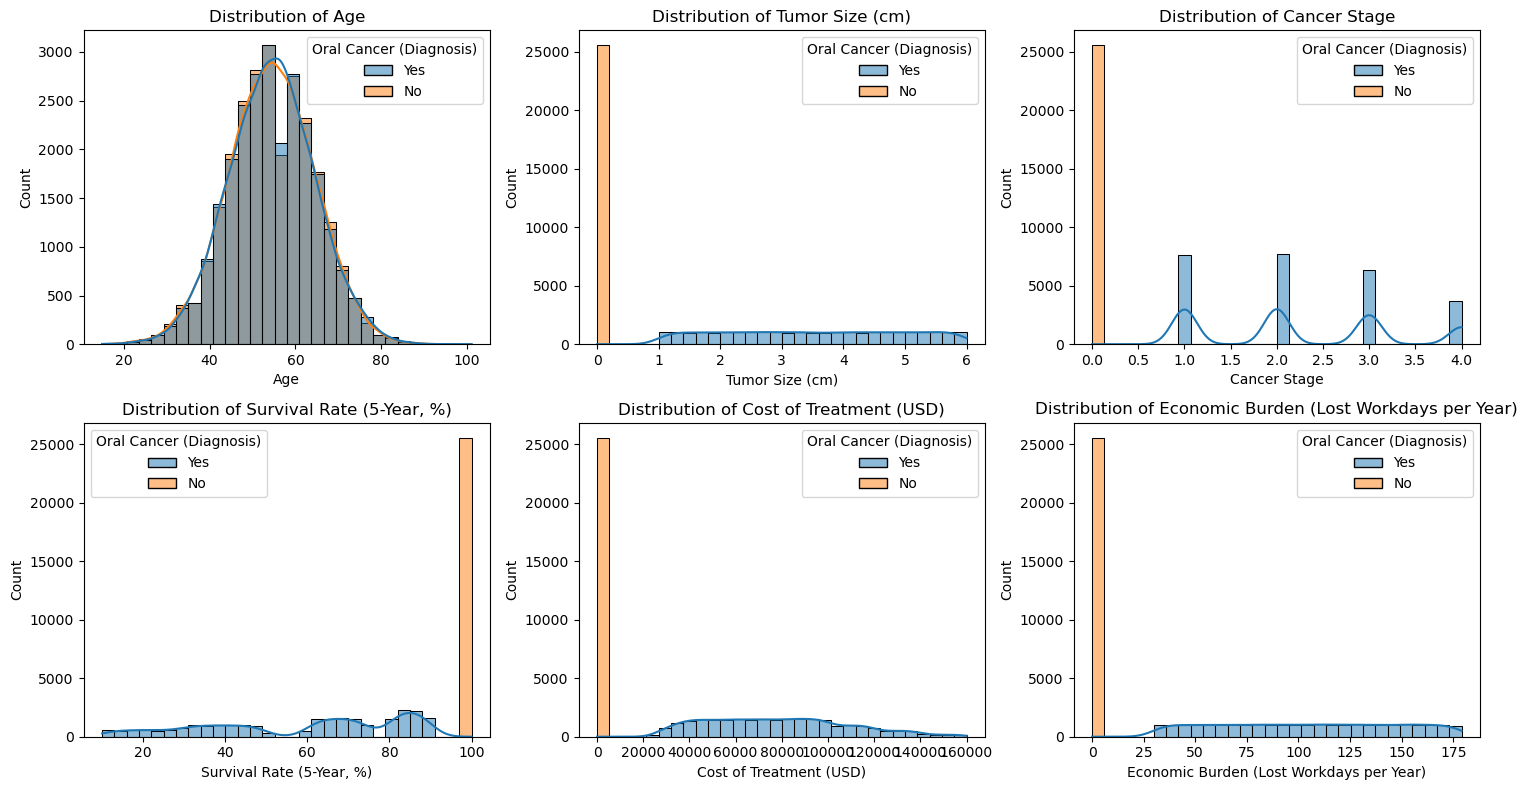

In [80]:
fig, axes = plt.subplots(nrows=len(numerical_features)//2 -1, ncols=len(numerical_features)//2, figsize=(15, 8))
axes = axes.flatten()


for i, feature in enumerate(numerical_features):
    sns.histplot(data=df_train, x=feature, hue="Oral Cancer (Diagnosis)", bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    
plt.tight_layout()
plt.show()

# Categorical Features

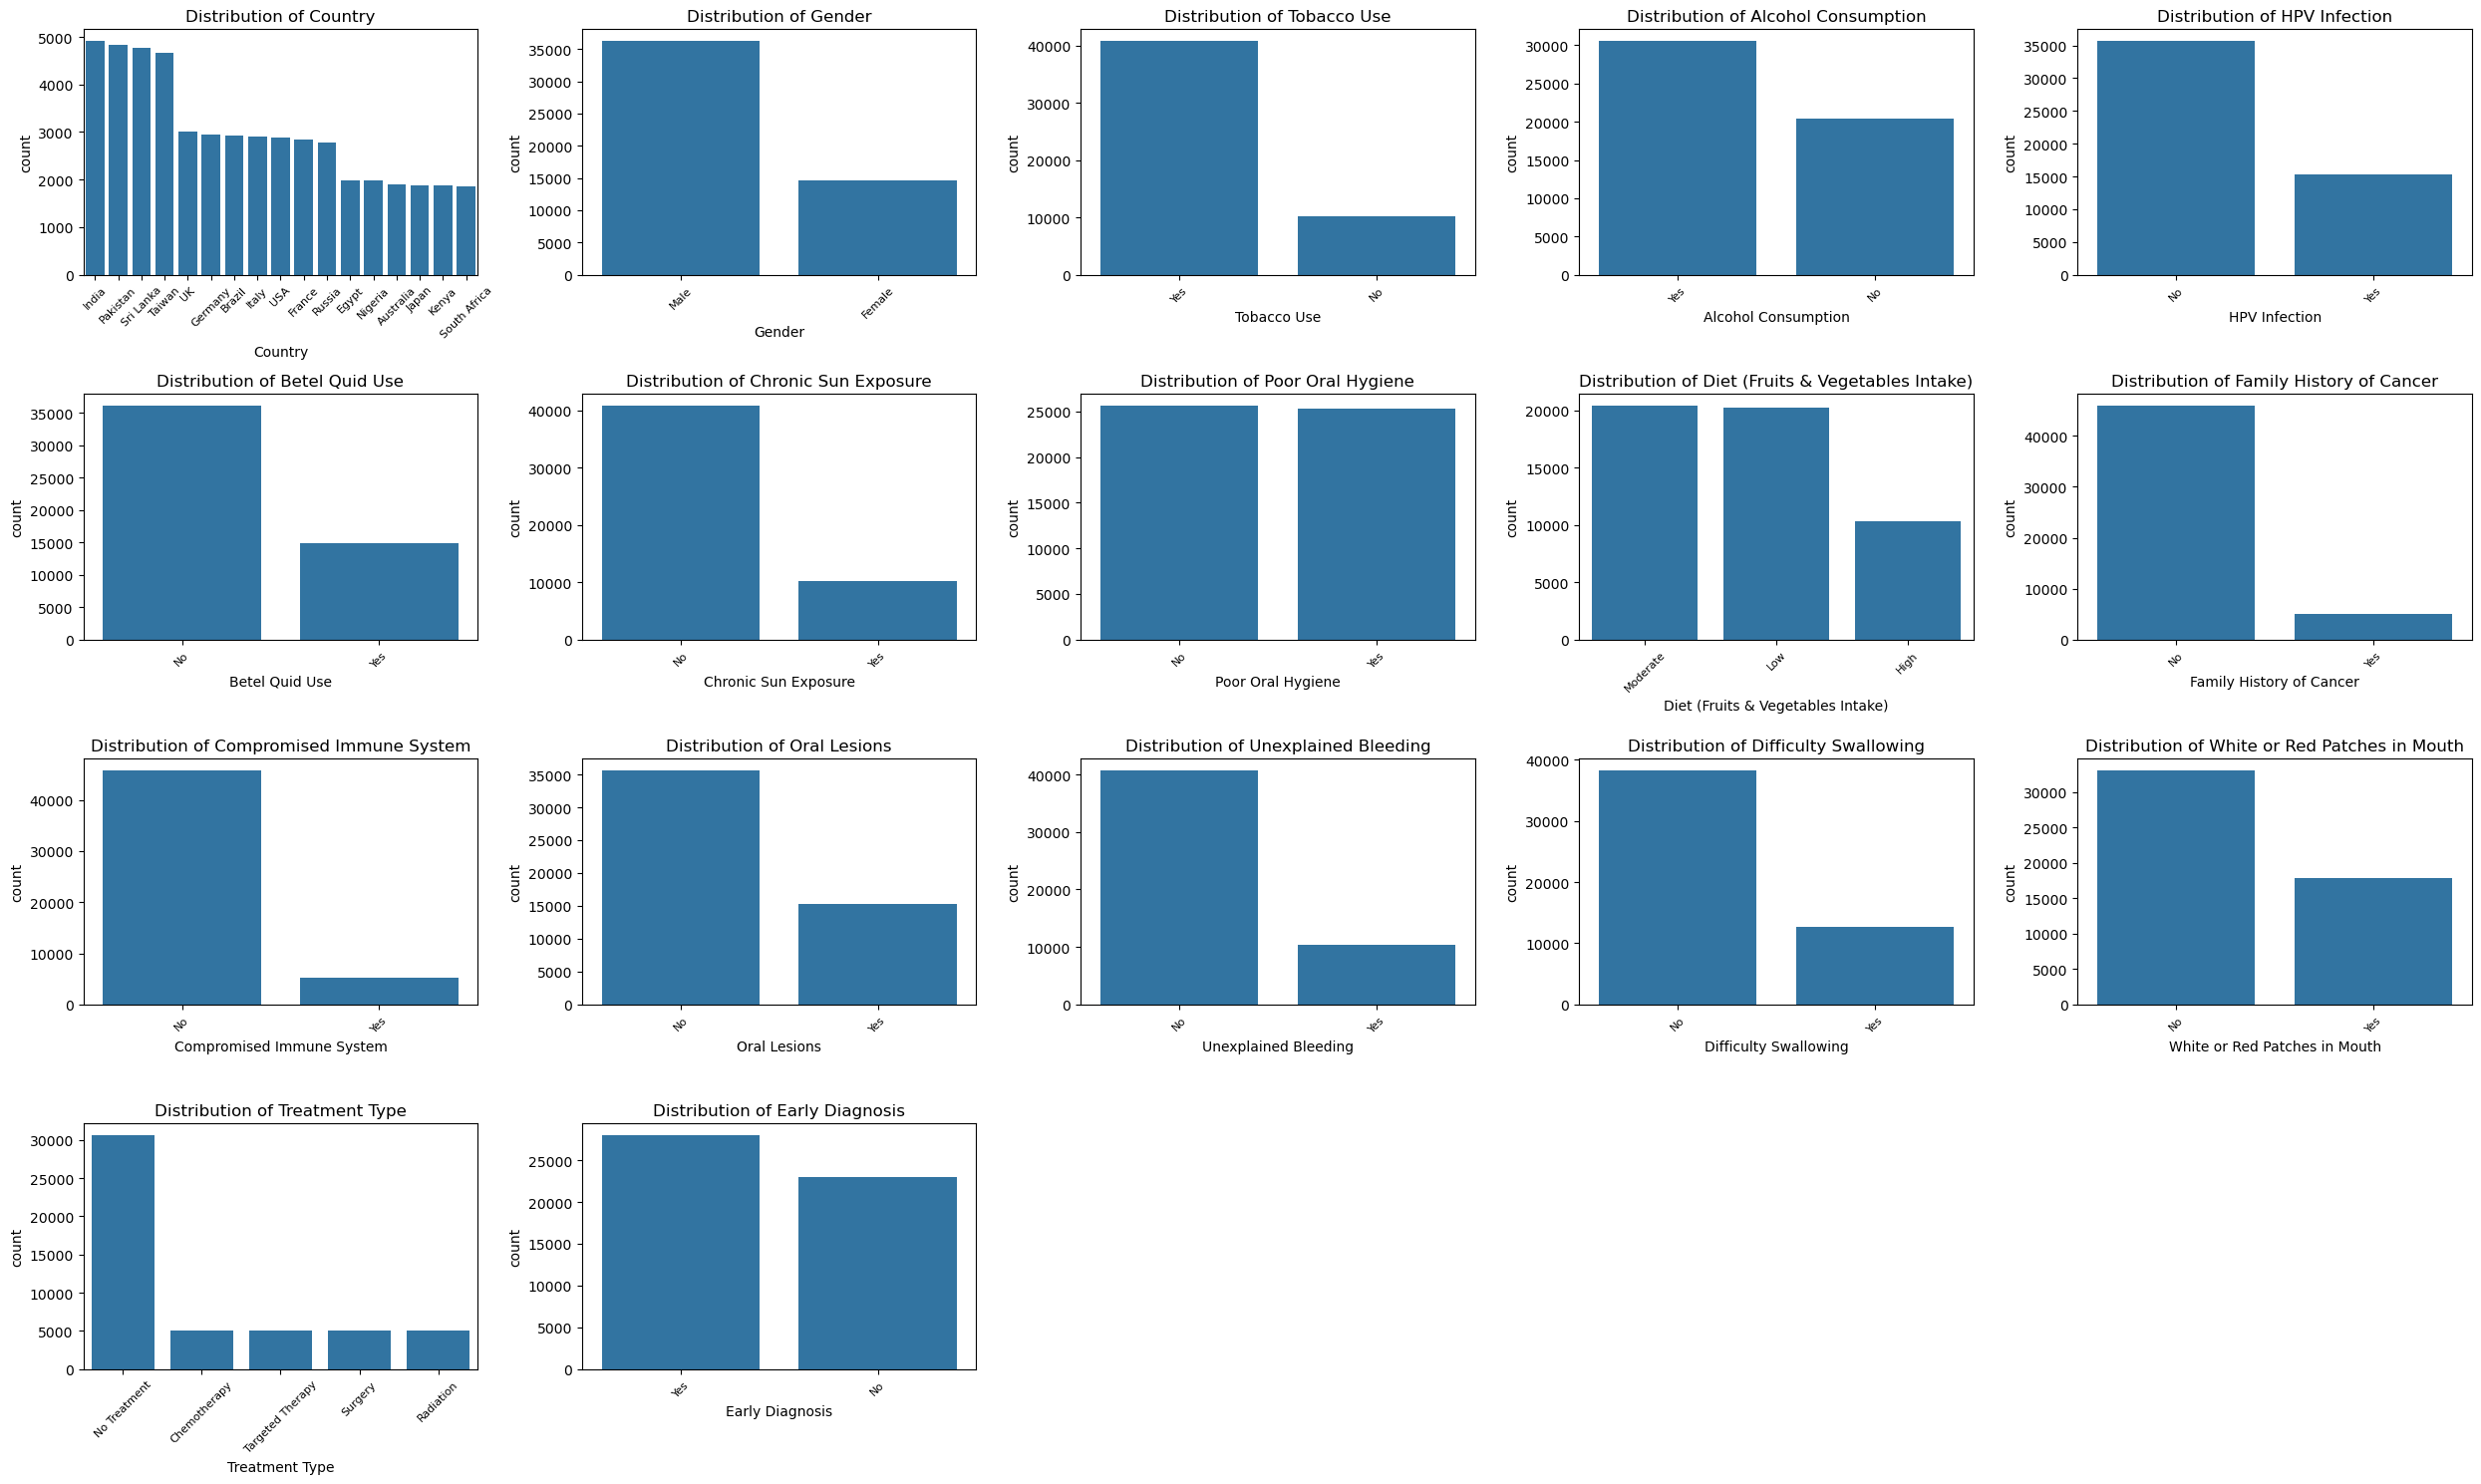

In [81]:
categorical_features = [
    'Country',
    'Gender',
    'Tobacco Use',
    'Alcohol Consumption',
    'HPV Infection',
    'Betel Quid Use',
    'Chronic Sun Exposure',
    'Poor Oral Hygiene',
    'Diet (Fruits & Vegetables Intake)',
    'Family History of Cancer',
    'Compromised Immune System',
    'Oral Lesions',
    'Unexplained Bleeding',
    'Difficulty Swallowing',
    'White or Red Patches in Mouth',
    'Treatment Type',
    'Early Diagnosis'
]
plt.figure(figsize=(25, 15))

# Plot countplots for each categorical feature
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 5, i)  # Adjust the grid size based on the number of features
    sns.countplot(data=df_train, x=feature, order=df_train[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, fontsize=8)  # Rotate x-axis labels for better readability
    plt.tight_layout()

plt.show()

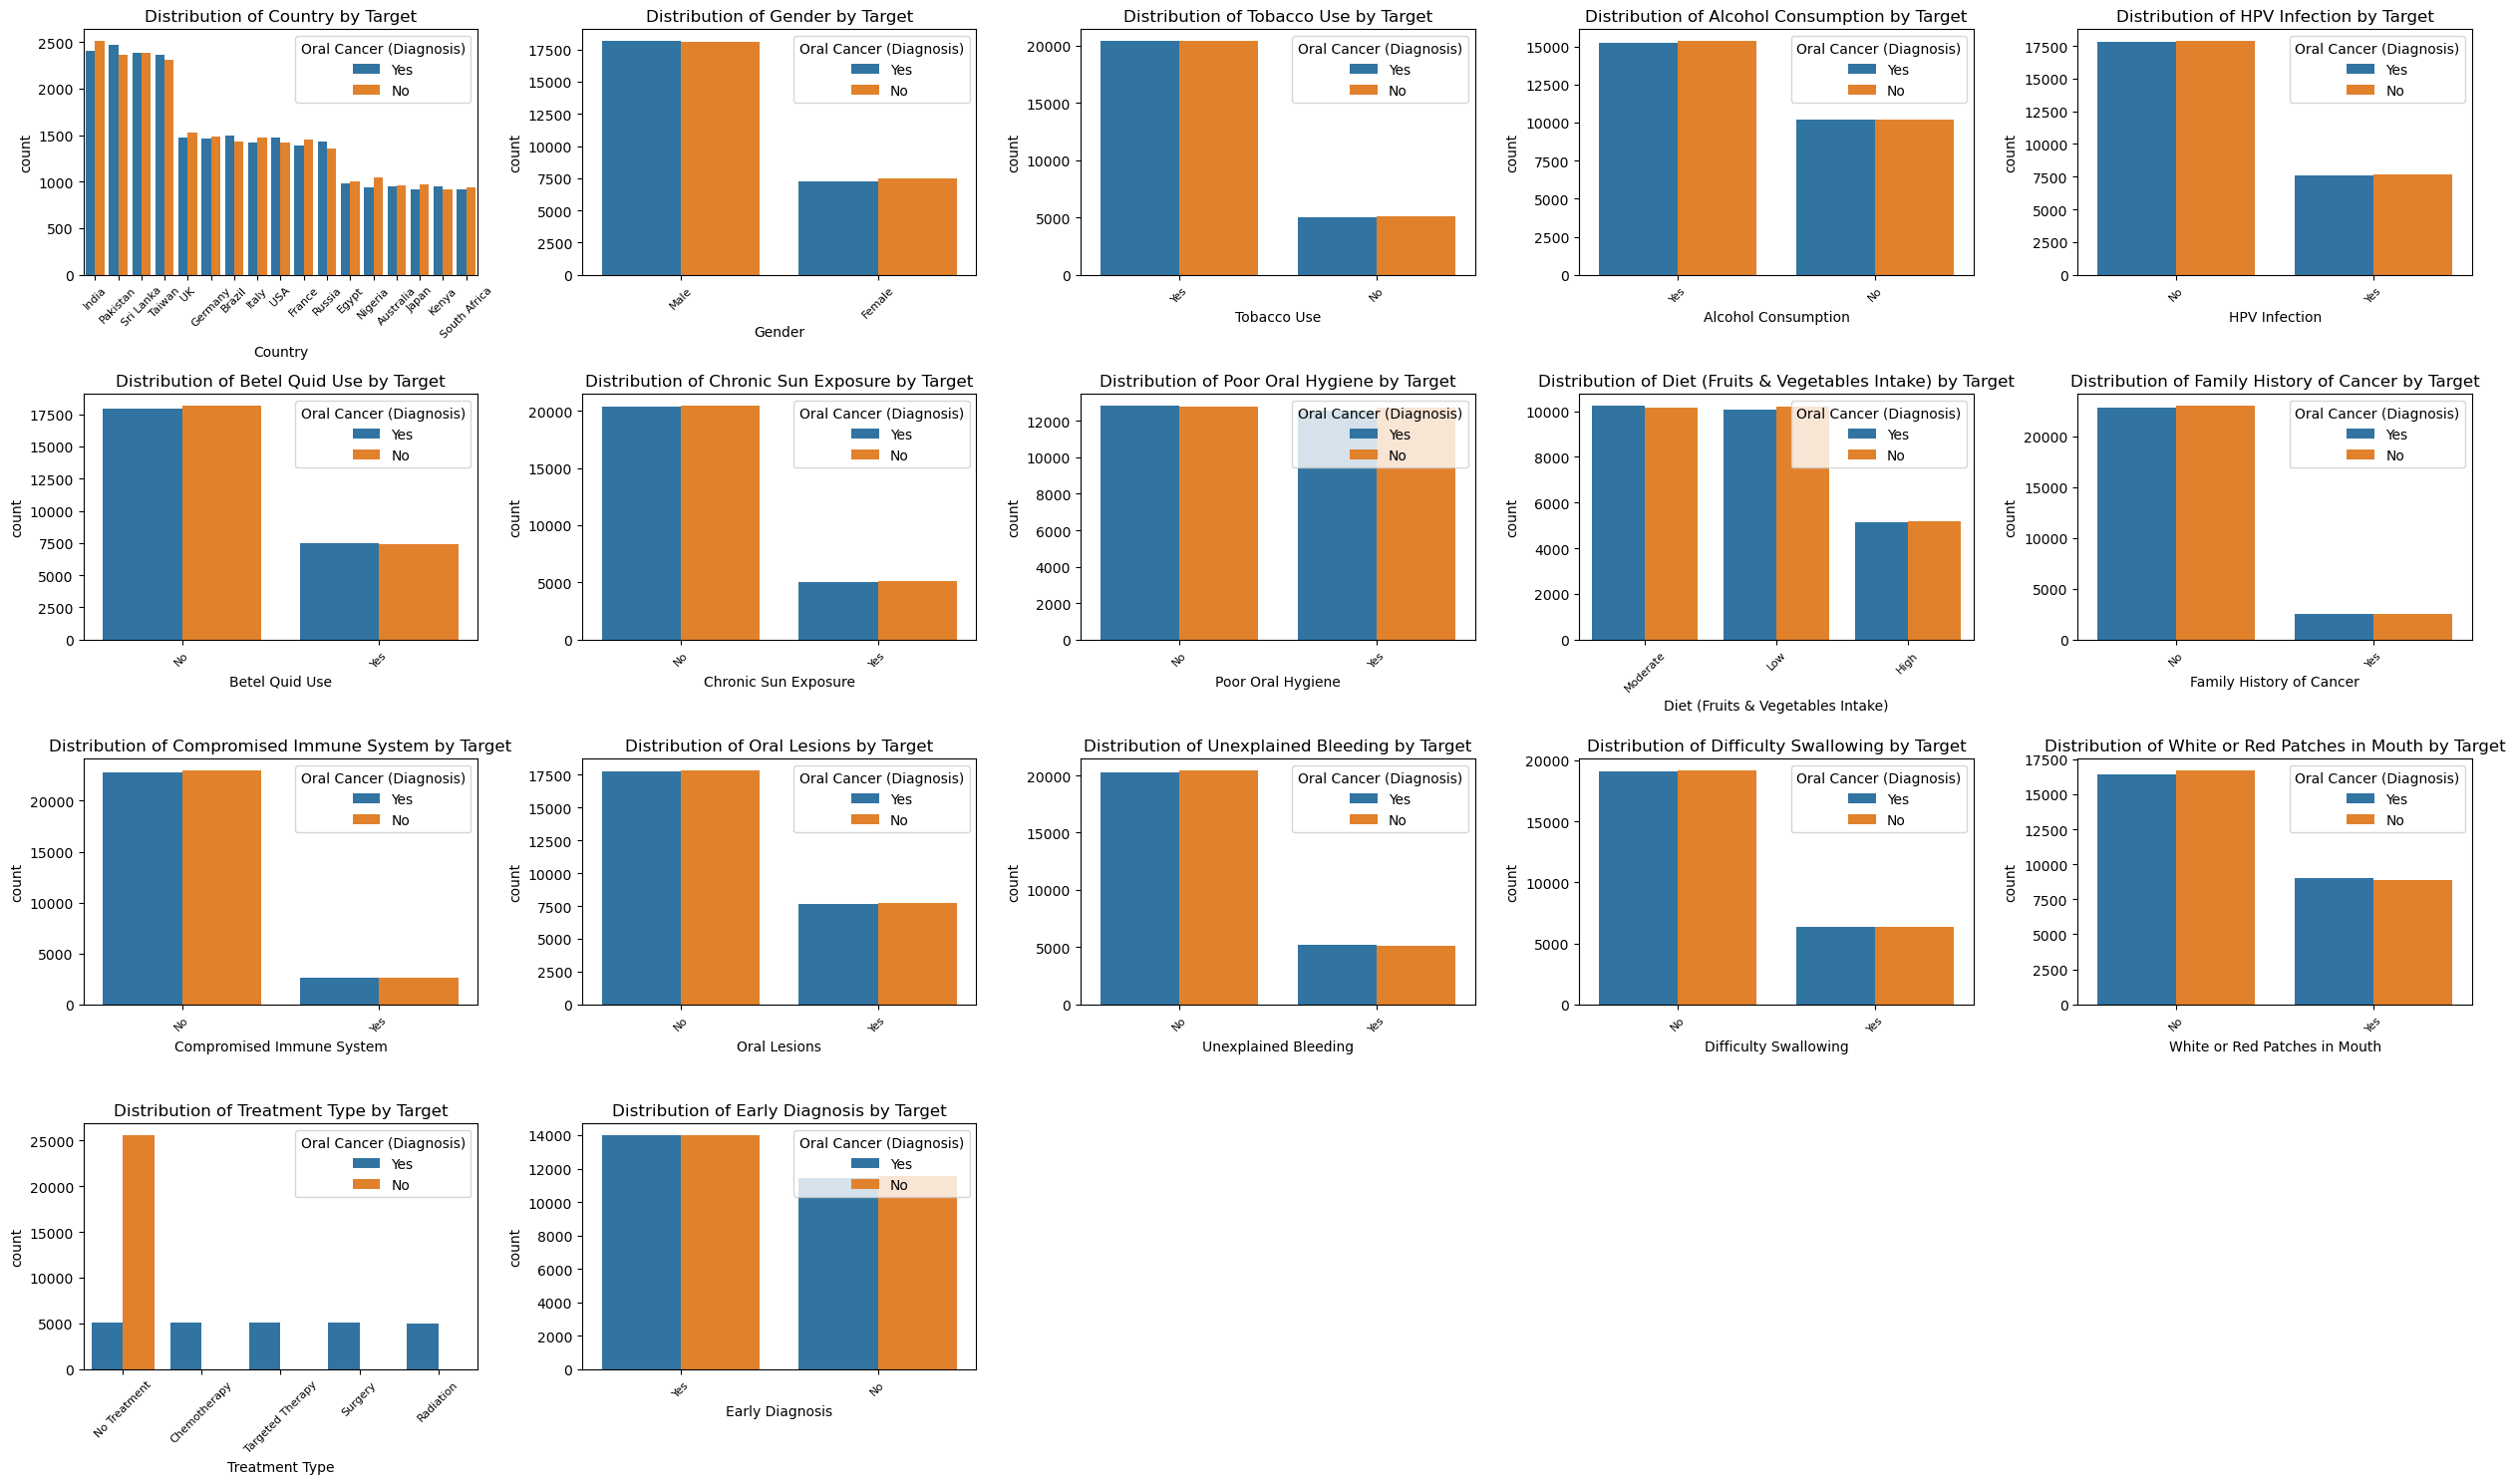

In [82]:
plt.figure(figsize=(25, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 5, i)  # Adjust the grid size based on the number of features
    sns.countplot(data=df_train, x=feature, hue='Oral Cancer (Diagnosis)', order=df_train[feature].value_counts().index)
    plt.title(f'Distribution of {feature} by Target')
    plt.xticks(rotation=45, fontsize=8)  # Rotate x-axis labels for better readability
    plt.tight_layout()

plt.show()

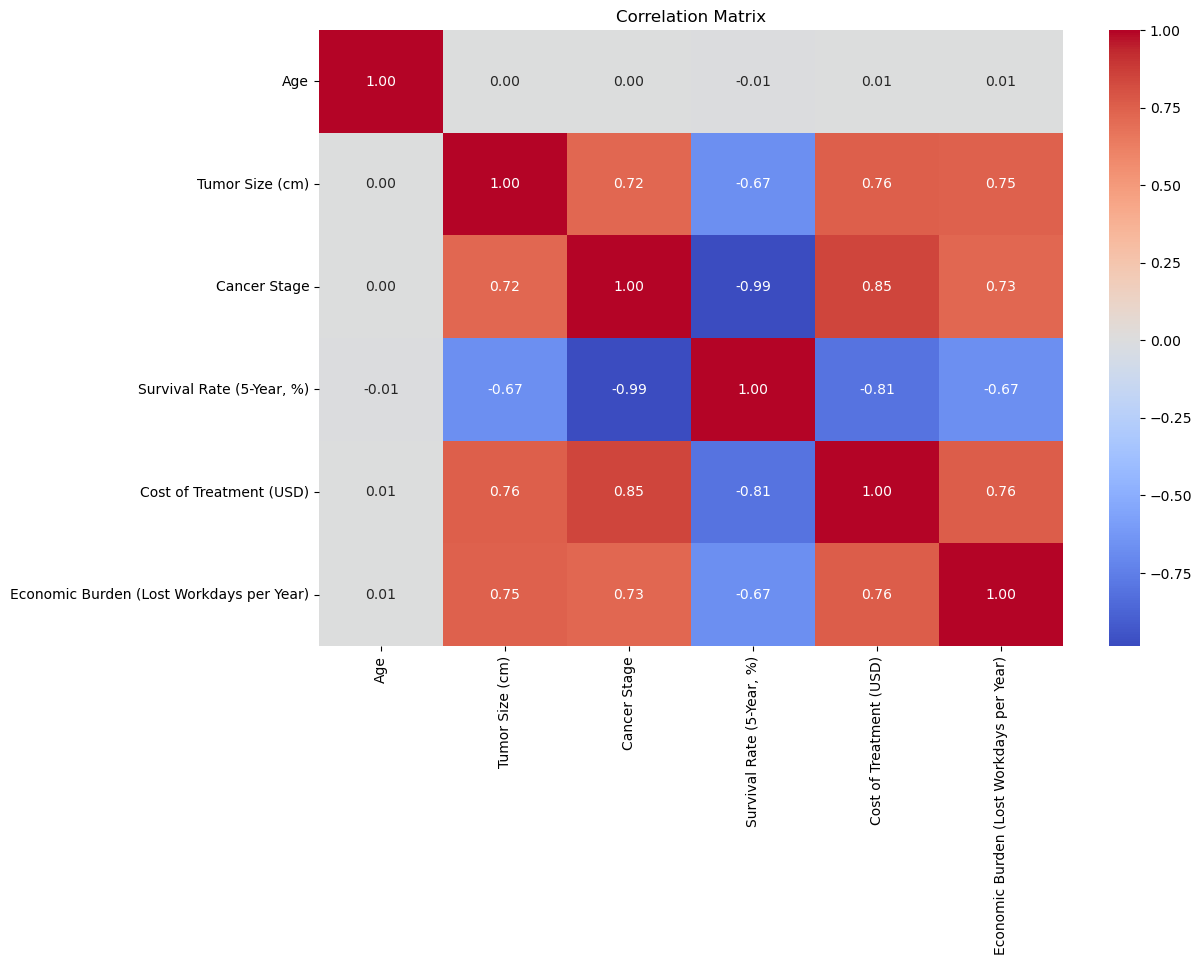

In [83]:
data = df_train[['Age','Tumor Size (cm)','Cancer Stage','Survival Rate (5-Year, %)','Cost of Treatment (USD)','Economic Burden (Lost Workdays per Year)']]
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

# Preprocessing data

## Preprocessing for categorical feature

### Feature only has yes or no value

In [5]:
binary_features_yes_no = [
    'Tobacco Use',
    'Alcohol Consumption',
    'HPV Infection',
    'Betel Quid Use',
    'Chronic Sun Exposure',
    'Poor Oral Hygiene',
    'Family History of Cancer',
    'Compromised Immune System',
    'Oral Lesions',
    'Unexplained Bleeding',
    'Difficulty Swallowing',
    'White or Red Patches in Mouth',
    'Early Diagnosis'
]

df_train = pd.get_dummies(df_train, columns=binary_features_yes_no, drop_first=True)
df_val = pd.get_dummies(df_val, columns=binary_features_yes_no, drop_first=True)
df_test = pd.get_dummies(df_test, columns=binary_features_yes_no, drop_first=True)
df_train.head().T

,0,1,2,3,4
ID,2263,32978,36925,61159,6587
Country,USA,Taiwan,France,Pakistan,Pakistan
Age,54,41,51,69,41
Gender,Male,Male,Female,Male,Female
Diet (Fruits & Vegetables Intake),Low,Low,High,Low,Low
Tumor Size (cm),5.785945,0.0,0.0,0.0,0.0
Cancer Stage,3,0,0,0,0
Treatment Type,No Treatment,No Treatment,No Treatment,No Treatment,No Treatment
"Survival Rate (5-Year, %)",41.740485,100.0,100.0,100.0,100.0
Cost of Treatment (USD),100833.25,0.0,0.0,0.0,0.0


In [6]:
categorical_features_non_yes_no = ['Country', 'Gender', 'Diet (Fruits & Vegetables Intake)', 'Treatment Type']

df_train = pd.get_dummies(df_train, columns=categorical_features_non_yes_no, drop_first=True)
df_val = pd.get_dummies(df_val, columns=categorical_features_non_yes_no, drop_first=True)
df_test = pd.get_dummies(df_test, columns=categorical_features_non_yes_no, drop_first=True)

# Hiển thị kết quả sau khi one-hot encoding
df_train.head().T

,0,1,2,3,4
ID,2263,32978,36925,61159,6587
Age,54,41,51,69,41
Tumor Size (cm),5.785945,0.0,0.0,0.0,0.0
Cancer Stage,3,0,0,0,0
"Survival Rate (5-Year, %)",41.740485,100.0,100.0,100.0,100.0
Cost of Treatment (USD),100833.25,0.0,0.0,0.0,0.0
Economic Burden (Lost Workdays per Year),30,0,0,0,0
Oral Cancer (Diagnosis),Yes,No,No,No,No
Tobacco Use_Yes,True,False,False,True,True
Alcohol Consumption_Yes,True,True,True,True,True


## Preprocessing for numerical feature

In [117]:
scaler = StandardScaler()
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])

# Transform validation and test data using the same scaler
df_val[numerical_features] = scaler.transform(df_val[numerical_features])  
df_test[numerical_features] = scaler.transform(df_test[numerical_features])

df_train

,ID,Age,Tumor Size (cm),Cancer Stage,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Oral Cancer (Diagnosis),Tobacco Use_Yes,Alcohol Consumption_Yes,...,Country_Taiwan,Country_UK,Country_USA,Gender_Male,Diet (Fruits & Vegetables Intake)_Low,Diet (Fruits & Vegetables Intake)_Moderate,Treatment Type_No Treatment,Treatment Type_Radiation,Treatment Type_Surgery,Treatment Type_Targeted Therapy
0,2263,-0.049183,1.987943,1.402993,-1.425238,1.383158,-0.365849,Yes,True,True,...,False,False,True,True,True,False,True,False,False,False
1,32978,-1.344766,-0.861963,-0.834932,0.774203,-0.874274,-0.862144,No,False,True,...,True,False,False,True,True,False,True,False,False,False
2,36925,-0.348163,-0.861963,-0.834932,0.774203,-0.874274,-0.862144,No,False,True,...,False,False,False,False,False,False,True,False,False,False
3,61159,1.445721,-0.861963,-0.834932,0.774203,-0.874274,-0.862144,No,True,True,...,False,False,False,True,True,False,True,False,False,False
4,6587,-1.344766,-0.861963,-0.834932,0.774203,-0.874274,-0.862144,No,True,True,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50947,26446,-0.647144,0.487285,-0.088957,0.324950,0.339060,-0.084615,Yes,True,True,...,False,False,False,False,False,False,False,True,False,False
50948,62500,0.648439,-0.861963,-0.834932,0.774203,-0.874274,-0.862144,No,True,False,...,True,False,False,True,False,False,True,False,False,False
50949,3561,0.449119,-0.861963,-0.834932,0.774203,-0.874274,-0.862144,No,True,True,...,False,True,False,True,True,False,True,False,False,False
50950,40903,-0.547484,-0.861963,-0.834932,0.774203,-0.874274,-0.862144,No,False,True,...,False,False,True,True,True,False,True,False,False,False


In [10]:
df_val

,ID,Age,Tumor Size (cm),Cancer Stage,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Oral Cancer (Diagnosis),Tobacco Use_Yes,Alcohol Consumption_Yes,...,Country_Taiwan,Country_UK,Country_USA,Gender_Male,Diet (Fruits & Vegetables Intake)_Low,Diet (Fruits & Vegetables Intake)_Moderate,Treatment Type_No Treatment,Treatment Type_Radiation,Treatment Type_Surgery,Treatment Type_Targeted Therapy
0,81353,60,5.260098,4,10.284153,44254.00,48,Yes,False,False,...,False,False,False,True,True,False,False,False,True,False
1,2750,55,3.438220,2,63.639690,75355.50,69,Yes,True,True,...,False,False,False,True,False,False,True,False,False,False
2,76429,61,0.000000,0,100.000000,0.00,0,No,False,True,...,False,False,False,True,True,False,True,False,False,False
3,36565,47,0.000000,0,100.000000,0.00,0,No,True,True,...,False,False,False,True,False,False,True,False,False,False
4,14243,55,4.810195,1,88.476593,88937.50,127,Yes,True,True,...,False,False,True,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16980,20085,53,0.000000,0,100.000000,0.00,0,No,True,False,...,False,False,False,False,True,False,True,False,False,False
16981,77195,59,0.000000,0,100.000000,0.00,0,No,True,False,...,False,False,False,True,True,False,True,False,False,False
16982,76195,64,0.000000,0,100.000000,0.00,0,No,True,False,...,False,True,False,False,False,False,True,False,False,False
16983,40686,46,4.351002,3,41.851932,64958.25,74,Yes,True,True,...,False,True,False,True,False,True,False,False,True,False


In [12]:
model_LRG = LogisticRegression()
X = df_train.drop(['Oral Cancer (Diagnosis)','ID'], axis=1)
y = df_train['Oral Cancer (Diagnosis)']
X_train,x_test, y_train,y_test = train_test_split(X,y, test_size=0.5, random_state=42)

model_LRG.fit(X_train, y_train)
y_pred = model_LRG.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00     12804
         Yes       1.00      1.00      1.00     12672

    accuracy                           1.00     25476
   macro avg       1.00      1.00      1.00     25476
weighted avg       1.00      1.00      1.00     25476

